# **Preprocesamiento de datos**

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # Se usarán las 10,000 palabras más comunes de la base de datos
maxlen = 500  # Usaremos solamente las primeras 500 palabras de cada crítica
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


# **Definimos el modelo**

In [3]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN #RNN -> Recurrent Neural Network
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))   # Numero de palabras del vocabulario, no se requiere poner el numero de palabras por cada critica
model.add(SimpleRNN(32))                 # Capa recurrente, genera un vector de salida de 32 dimensiones asociado a la palabra que entra
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

mc = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/Ai Lab School/SESION 7/model_rnn.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks = [mc])

Epoch 1/10
157/157 [==============================] - 23s 142ms/step - loss: 0.6722 - acc: 0.5677 - val_loss: 0.5840 - val_acc: 0.6964

Epoch 00001: val_acc improved from -inf to 0.69640, saving model to /content/drive/My Drive/Colab Notebooks/Ai Lab School/SESION 7/model_rnn.h5
Epoch 2/10
157/157 [==============================] - 22s 141ms/step - loss: 0.4414 - acc: 0.8047 - val_loss: 0.4674 - val_acc: 0.7864

Epoch 00002: val_acc improved from 0.69640 to 0.78640, saving model to /content/drive/My Drive/Colab Notebooks/Ai Lab School/SESION 7/model_rnn.h5
Epoch 3/10
157/157 [==============================] - 22s 141ms/step - loss: 0.2999 - acc: 0.8817 - val_loss: 0.3709 - val_acc: 0.8470

Epoch 00003: val_acc improved from 0.78640 to 0.84700, saving model to /content/drive/My Drive/Colab Notebooks/Ai Lab School/SESION 7/model_rnn.h5
Epoch 4/10
157/157 [==============================] - 22s 140ms/step - loss: 0.2290 - acc: 0.9119 - val_loss: 0.3943 - val_acc: 0.8522

Epoch 00004: val_a

# **Curvas de exactitud y pérdida**

Best accuracy epoch :  5, Value :  0.9
Best loss epoch :  3, Value :  0.3709436357


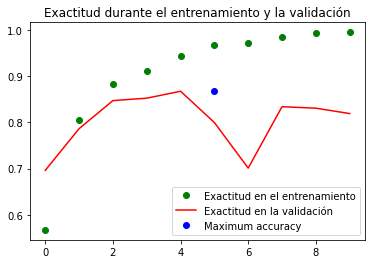

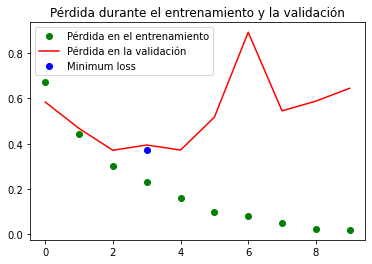

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Exactitud en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Exactitud en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Maximum accuracy')
plt.title('Exactitud durante el entrenamiento y la validación')
plt.legend()
print("Best accuracy epoch : % d, Value : % .1f" %(max_val_acc_epoch, max_val_acc)) 
plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print("Best loss epoch : % d, Value : % .10f" %(min_val_loss_epoch, min_val_loss))

plt.show()

# **Implementación de una LSTM**

In [5]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

mc = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/Ai Lab School/SESION 7/model_ltsm.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks = [mc])

Epoch 1/10
157/157 [==============================] - 51s 315ms/step - loss: 0.5129 - acc: 0.7571 - val_loss: 0.3425 - val_acc: 0.8652

Epoch 00001: val_acc improved from -inf to 0.86520, saving model to /content/drive/My Drive/Colab Notebooks/Ai Lab School/SESION 7/model_ltsm.h5
Epoch 2/10
157/157 [==============================] - 49s 311ms/step - loss: 0.2977 - acc: 0.8824 - val_loss: 0.2877 - val_acc: 0.8836

Epoch 00002: val_acc improved from 0.86520 to 0.88360, saving model to /content/drive/My Drive/Colab Notebooks/Ai Lab School/SESION 7/model_ltsm.h5
Epoch 3/10
157/157 [==============================] - 49s 309ms/step - loss: 0.2393 - acc: 0.9092 - val_loss: 0.2803 - val_acc: 0.8840

Epoch 00003: val_acc improved from 0.88360 to 0.88400, saving model to /content/drive/My Drive/Colab Notebooks/Ai Lab School/SESION 7/model_ltsm.h5
Epoch 4/10
157/157 [==============================] - 48s 306ms/step - loss: 0.2067 - acc: 0.9241 - val_loss: 0.3082 - val_acc: 0.8858

Epoch 00004: va

# **Curvas de exactitud y pérdida**

Best accuracy epoch :  9, Value :  0.9
Best loss epoch :  3, Value :  0.2802773416


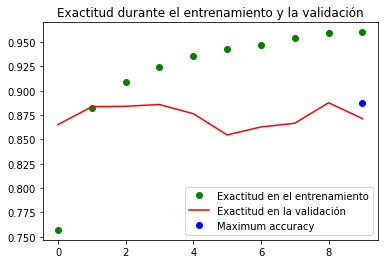

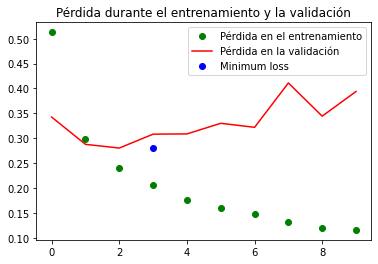

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Exactitud en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Exactitud en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Maximum accuracy')
plt.title('Exactitud durante el entrenamiento y la validación')
plt.legend()
print("Best accuracy epoch : % d, Value : % .1f" %(max_val_acc_epoch, max_val_acc)) 
plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print("Best loss epoch : % d, Value : % .10f" %(min_val_loss_epoch, min_val_loss))

plt.show()

# **Bibliografía sugerida:** <br>
https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21 <br>
Libro: Deep Learning with Python, de François Chollet